In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import io
import matplotlib.lines as lines

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
filename = "/content/base_jerry.xlsx"
tabla = pd.read_excel( filename)
tabla.head()

,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,100,100,65,89,65,95,65,92,58.0,86,363,99
1,100,100,100,100,73,99,76,100,80.0,100,433,100
2,100,100,72,97,64,93,67,94,69.0,95,376,100
3,100,100,74,99,70,98,71,98,56.0,83,385,100
4,100,100,76,99,77,100,70,97,69.0,95,399,100


In [ ]:
tabla = tabla[["PUNT_LECTURA_CRITICA",
               "PUNT_MATEMATICAS",
               "PERCENTIL_GLOBAL"]]
Y= tabla.PERCENTIL_GLOBAL
X= tabla.drop(['PERCENTIL_GLOBAL'], axis=1)
X.head()

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS
0,100,65
1,100,100
2,100,72
3,100,74
4,100,76


In [ ]:
print(np.linspace(10,-2,100)[:10])
lambdas = 10**np.linspace(10,-2,100)*0.5
# print(lambdas[:10])
# print(lambdas[-10:])

[10.          9.87878788  9.75757576  9.63636364  9.51515152  9.39393939
  9.27272727  9.15151515  9.03030303  8.90909091]


In [ ]:
sin_atipicos = tabla[(tabla["PERCENTIL_GLOBAL"] < 6000) & (tabla["PUNT_LECTURA_CRITICA"] < 800)]
sin_atipicos.head()

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_GLOBAL
0,100,65,99
1,100,100,100
2,100,72,100
3,100,74,100
4,100,76,100


In [ ]:
tabla1 = pd.concat([sin_atipicos["PERCENTIL_GLOBAL"], sin_atipicos["PUNT_LECTURA_CRITICA"],  sin_atipicos["PUNT_MATEMATICAS"]], axis = 1)
tabla1.head()

,PERCENTIL_GLOBAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS
0,99,100,65
1,100,100,100
2,100,100,72
3,100,100,74
4,100,100,76


In [ ]:
from sklearn.model_selection import train_test_split # Acá vamos a seleccionar los datos de entrenamiento y de prueba
x_train, x_test, y_train, y_test, z_train, z_test= train_test_split(tabla1["PERCENTIL_GLOBAL"], tabla1["PUNT_LECTURA_CRITICA"], tabla1["PUNT_MATEMATICAS"], test_size = 0.3)
 # Escogemos el 30% de los datos para prueba

In [ ]:
print(x_train, y_train, z_train)

239340    57
472915     7
439534    25
82647     68
338155    25
          ..
330171    23
224567    67
256737    77
406441    14
333992    32
Name: PERCENTIL_GLOBAL, Length: 340865, dtype: int64 239340    52
472915    34
439534    38
82647     62
338155    47
          ..
330171    47
224567    53
256737    52
406441    42
333992    47
Name: PUNT_LECTURA_CRITICA, Length: 340865, dtype: int64 239340    53
472915    29
439534    50
82647     56
338155    58
          ..
330171    40
224567    60
256737    57
406441    40
333992    46
Name: PUNT_MATEMATICAS, Length: 340865, dtype: int64


In [ ]:
yz_train = pd.concat([y_train, z_train], axis=1)
yz_train

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS
239340,52,53
472915,34,29
439534,38,50
82647,62,56
338155,47,58
...,...,...
330171,47,40
224567,53,60
256737,52,57
406441,42,40


In [ ]:
yz_test = pd.concat([y_test, z_test], axis=1)
yz_test

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS
273825,51,52
29421,68,59
17909,70,78
182025,56,61
85030,62,52
...,...,...
121931,59,64
173768,56,65
299003,49,65
475163,33,38


In [ ]:
from sklearn.linear_model import Lasso, LassoCV

In [ ]:
lasso = Lasso(max_iter = 10000)
coefs = []

for k in lambdas:
    lasso.set_params(alpha = k)
    lasso.fit(scale(yz_train), x_train)
    coefs.append(lasso.coef_)


np.shape(coefs)

(100, 2)

In [ ]:
print("El intercepto del modelo es: ", lasso.intercept_)
print("Coeficiente:", list(zip(yz_train, lasso.coef_.flatten(), )))

El intercepto del modelo es:  49.935194285127544
Coeficiente: [('PUNT_LECTURA_CRITICA', 15.495683485502257), ('PUNT_MATEMATICAS', 14.017199681380937)]


In [ ]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000) #utilizamos cros validation
lassocv.fit(yz_train, x_train)

LassoCV(cv=10, max_iter=100000)

In [ ]:
print(pd.Series(lassocv.coef_, index = X.columns)) #Valor de coeficientes

PUNT_LECTURA_CRITICA    1.532317
PUNT_MATEMATICAS        1.206155
dtype: float64


In [ ]:
lasso.set_params(alpha=lassocv.alpha_)
print("El valor de lambda encontrado con cross validation es:", round(lassocv.alpha_, 3))
lasso.fit(yz_train, x_train)

El valor de lambda encontrado con cross validation es: 0.289


Lasso(alpha=0.2889035801467682, max_iter=10000)

In [ ]:
x_pred = lasso.predict(yz_test)
x_pred

array([ 49.44537896,  83.9378564 , 109.91943018, ...,  62.06075528,
         4.97750136,  62.28842206])

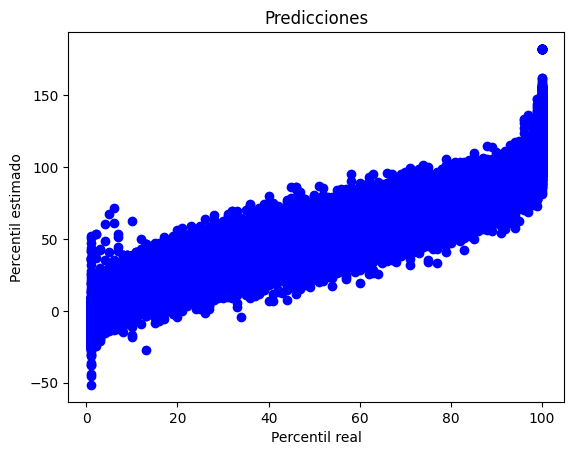

In [ ]:
plt.scatter(x_test, x_pred, color = "blue")
plt.title("Predicciones")
plt.xlabel("Percentil real")
plt.ylabel("Percentil estimado")
plt.show()

In [ ]:
ECMcv = round(mean_squared_error(x_test, x_pred),3)
print(ECMcv)

93.513


In [ ]:
print("ECM con lambda es:", ECMcv)

ECM con lambda es: 93.513


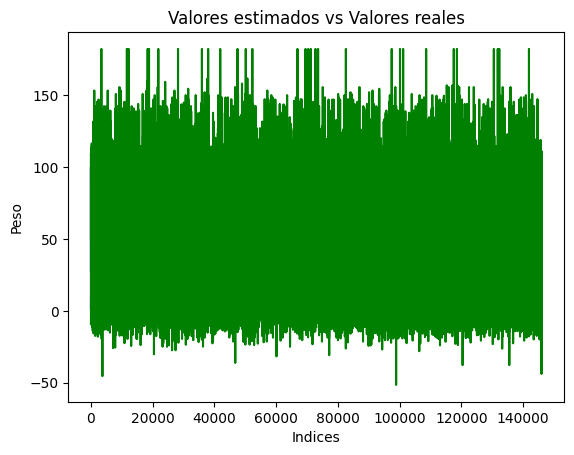

In [ ]:
eje_X = range(1,len(x_test)+1)
plt.plot(eje_X, x_test, color = "blue")
plt.plot(eje_X, x_pred, color = "green")
plt.title("Valores estimados vs Valores reales")
plt.xlabel("Indices")
plt.ylabel("Peso")
plt.show()

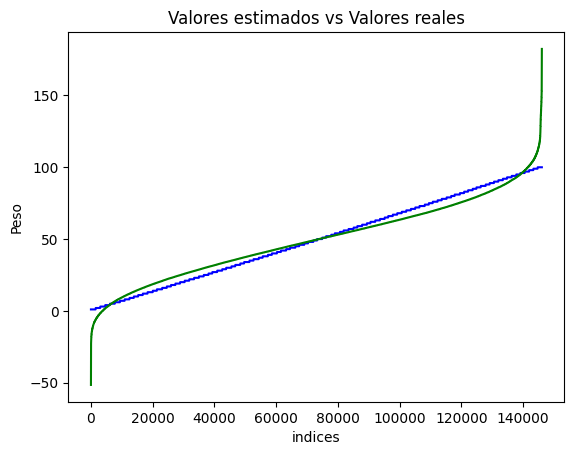

In [ ]:
eje_X = range(1, len(x_test)+1)
plt.plot(eje_X, sorted(x_test), color = "blue")
plt.plot(eje_X, sorted(x_pred), color = "green")
plt.title("Valores estimados vs Valores reales")
plt.xlabel("indices")
plt.ylabel("Peso")
plt.show()

In [ ]:
err_abs = x_test-x_pred
err_cuad = pow(err_abs, 2)
print("ECM con lambda = ", round(lassocv.alpha_, 3), "es:", ECMcv)

ECM con lambda =  0.289 es: 93.513


In [ ]:
r_cuadrada = r2_score(x_test, x_pred)
print("R^2 = ", round(r_cuadrada,3))

n = len(yz_train)
p = len(x_train)
r_cuad_aj =1 - (((1- r_cuadrada)*(n-1))/(n-p-1))

print("n = ",n)
print("p =",p)
print("R^2 =", round(r_cuad_aj,3)) #porcentaje de variabilidad utilizamos la r^2 ajustada

R^2 =  0.888
n =  340865
p = 340865
R^2 = 38174.437


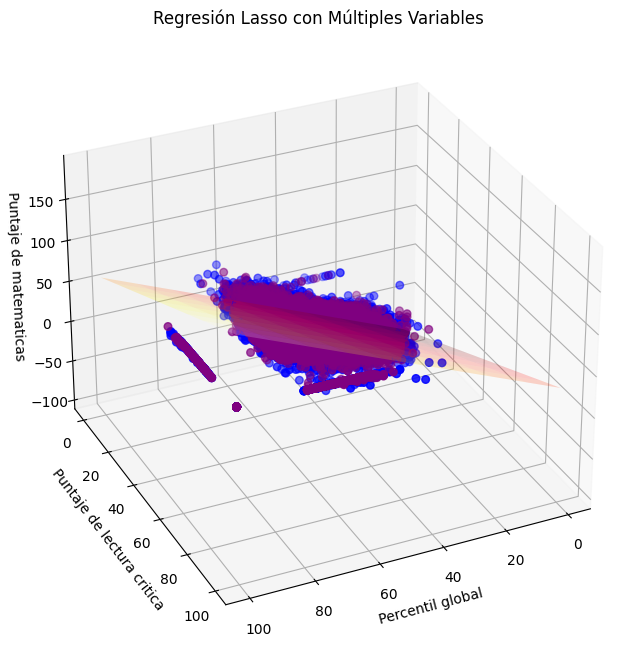

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(0, 100, num=10), np.linspace(0, 100, num=10))
n = list(zip(yz_train, lasso.coef_.flatten(), ))

nuevoX = (n[0][1] * xx)
nuevoY = (n[1][1] * yy)


x = (nuevoX + nuevoY + lasso.intercept_)
ax.plot_surface(xx, yy, x, alpha=0.2, cmap='hot')
ax.scatter(yz_train["PUNT_LECTURA_CRITICA"], yz_train["PUNT_MATEMATICAS"], x_train, c='blue',s=30)
ax.scatter(yz_test["PUNT_LECTURA_CRITICA"], yz_test["PUNT_MATEMATICAS"], x_test, c='purple',s=30)
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Percentil global')
ax.set_ylabel('Puntaje de lectura critica')
ax.set_zlabel('Puntaje de matematicas')
ax.set_title('Regresión Lasso con Múltiples Variables')

plt.show()

In [ ]:
yz_test = pd.concat([y_test, z_test], axis=1)
r2 = lasso.score(yz_test, x_test)
r2

0.888009772459449